In [1]:
import numpy as np
import mplhep as hep
import matplotlib.pyplot as plt
import uproot, os, sys
# Get the notebook directory
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
# Add the project root to sys.path
sys.path.append(os.path.join(notebook_dir, ".."))
from utils.branches import get_branches, truth_branches
from utils.plot import plot_data
from utils.constants import truthJpsiK, trigcut, dataPath, mcCorrPath, mcPath
from matplotlib import rcParams
import matplotlib as mpl
plt.style.use(hep.style.LHCb1)
config = {"mathtext.fontset":'stix'}
rcParams.update(config)

In [2]:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times", "Computer Modern Roman", "DejaVu Serif"]
})

In [3]:
track = "DD"
decay = r"$B^+\to \bar{\Lambda}^0pKK$"
dataPath = "/eos/lhcb/user/m/melashri/data/bu2LpKK/RD/reduced"
track = "LL"  # or "DD"
particles = ["h1", "h2", "p"]


In [4]:

# Get the list of files matching the criteria
filelist = [
    f"{dataPath}/{file}:B2L0barPKpKm_{track}/DecayTree"
    for file in os.listdir(dataPath) if file.startswith("Bu2L0barPHH_")
]
filelist += [
    f"{dataPath}/{file}:B2L0PbarKpKp_{track}/DecayTree"
    for file in os.listdir(dataPath) if file.startswith("Bu2L0barPHH_")
]

# Debugging: Print the filelist to check for issues
print("Files being processed:", filelist)

# Ensure `branches` is properly called with particles
branch_list = get_branches(particles)  # Call the function and get a list

# Debugging: Print branch list to confirm it's correct
print("Branches being read:", branch_list)

# Process the ROOT files with uproot
_data = uproot.concatenate(filelist, branch_list)

Files being processed: ['/eos/lhcb/user/m/melashri/data/bu2LpKK/RD/reduced/Bu2L0barPHH_16MD_reduced_reduced.root:B2L0barPKpKm_LL/DecayTree', '/eos/lhcb/user/m/melashri/data/bu2LpKK/RD/reduced/Bu2L0barPHH_16MU_reduced_reduced.root:B2L0barPKpKm_LL/DecayTree', '/eos/lhcb/user/m/melashri/data/bu2LpKK/RD/reduced/Bu2L0barPHH_17MD_reduced_reduced.root:B2L0barPKpKm_LL/DecayTree', '/eos/lhcb/user/m/melashri/data/bu2LpKK/RD/reduced/Bu2L0barPHH_17MU_reduced_reduced.root:B2L0barPKpKm_LL/DecayTree', '/eos/lhcb/user/m/melashri/data/bu2LpKK/RD/reduced/Bu2L0barPHH_18MD_reduced_reduced.root:B2L0barPKpKm_LL/DecayTree', '/eos/lhcb/user/m/melashri/data/bu2LpKK/RD/reduced/Bu2L0barPHH_18MU_reduced_reduced.root:B2L0barPKpKm_LL/DecayTree', '/eos/lhcb/user/m/melashri/data/bu2LpKK/RD/reduced/Bu2L0barPHH_16MD_reduced_reduced.root:B2L0PbarKpKp_LL/DecayTree', '/eos/lhcb/user/m/melashri/data/bu2LpKK/RD/reduced/Bu2L0barPHH_16MU_reduced_reduced.root:B2L0PbarKpKp_LL/DecayTree', '/eos/lhcb/user/m/melashri/data/bu2LpKK/

In [7]:
# Generate the list of MC files **only for the selected track J/psi**
filelist = [
    f"{mcCorrPath}/{file}:DecayTree"
    for file in os.listdir(mcCorrPath)
    if track in file
    and any(decay in file for decay in ["PKmL0bar_LL_PIDCorr", "PbarKpL0_LL_PIDCorr"])
]

# Debugging: Print the filelist to check for issues
print(f"MC Files being processed for track '{track}':", filelist)

# Define the particle setup
particles = ["h1", "h2", "p"]

# Retrieve branches: physics branches
branch_list = get_branches(particles)

# Ensure extra branches are included
branch_list += [
    "p_MC15TuneV1_ProbNNp_corr",
    "h1_MC15TuneV1_ProbNNk_corr",
    "h2_MC15TuneV1_ProbNNk_corr",
    "Bu_TRUEID"
]

# Debugging: Print branch list to confirm correctness
print("MC Branches being read:", branch_list)

# Apply the cut selection (`trigcut + truthJpsiK`)
_mc = uproot.concatenate(filelist, branch_list, cut=trigcut + truthJpsiK)


MC Files being processed for track 'LL': ['/eos/lhcb/user/m/melashri/data/bu2LpKK/MC/PIDCorrection/MC16MDBu2JpsiKp,PKmL0bar_LL_PIDCorr.root:DecayTree', '/eos/lhcb/user/m/melashri/data/bu2LpKK/MC/PIDCorrection/MC16MDBu2JpsiKp,PbarKpL0_LL_PIDCorr.root:DecayTree', '/eos/lhcb/user/m/melashri/data/bu2LpKK/MC/PIDCorrection/MC16MUBu2JpsiKp,PKmL0bar_LL_PIDCorr.root:DecayTree', '/eos/lhcb/user/m/melashri/data/bu2LpKK/MC/PIDCorrection/MC16MUBu2JpsiKp,PbarKpL0_LL_PIDCorr.root:DecayTree', '/eos/lhcb/user/m/melashri/data/bu2LpKK/MC/PIDCorrection/MC17MDBu2JpsiKp,PKmL0bar_LL_PIDCorr.root:DecayTree', '/eos/lhcb/user/m/melashri/data/bu2LpKK/MC/PIDCorrection/MC17MDBu2JpsiKp,PbarKpL0_LL_PIDCorr.root:DecayTree', '/eos/lhcb/user/m/melashri/data/bu2LpKK/MC/PIDCorrection/MC17MUBu2JpsiKp,PKmL0bar_LL_PIDCorr.root:DecayTree', '/eos/lhcb/user/m/melashri/data/bu2LpKK/MC/PIDCorrection/MC17MUBu2JpsiKp,PbarKpL0_LL_PIDCorr.root:DecayTree', '/eos/lhcb/user/m/melashri/data/bu2LpKK/MC/PIDCorrection/MC18MDBu2JpsiKp,PKmL0

In [8]:
def select(arr):
    selection =  (arr["Lp_MC15TuneV1_ProbNNp"]>0.2) & (np.abs(arr["L0_M"]-1115.6)<6) & (arr["Bu_PT"]>3000)
    # selection = selection & (abs(arr["Bu_TRUEID"]==521))
    if track == "LL":
        selection = selection & ((arr["L0_ENDVERTEX_Z"]-arr["Bu_ENDVERTEX_Z"])>20)  & (arr["L0_FDCHI2_ORIVX"]>45)
        # selection = selection & ((arr["p_MC15TuneV1_ProbNNp"] * arr["h1_MC15TuneV1_ProbNNk"] * arr["h2_MC15TuneV1_ProbNNk"])>0.2) # & (np.log(arr["Bu_IPCHI2_OWNPV"])<1.7)

    # else:
        # selection = selection & ((arr["p_MC15TuneV1_ProbNNp"] * arr["h1_MC15TuneV1_ProbNNk"] * arr["h2_MC15TuneV1_ProbNNk"])>0.2) # & (np.log(arr["Bu_IPCHI2_OWNPV"])<2.0)
    return arr[selection]

In [9]:
data = select(_data)

In [10]:
# define ccbar_M1 and ccbar_M2 for MC. M here is the invariant mass of tree body combinations
_mc["ccbar_M1"] = np.sqrt(
    _mc["h1_PX"] ** 2
    + _mc["h1_PY"] ** 2
    + _mc["h1_PZ"] ** 2
    + 139.57 ** 2
)
_mc["ccbar_M2"] = np.sqrt(
    _mc["h2_PX"] ** 2
    + _mc["h2_PY"] ** 2
    + _mc["h2_PZ"] ** 2
    + 139.57 ** 2
)

# we calculate for data the invariant mass of the tree body combinations
data["ccbar_M1"] = np.sqrt(
    data["h1_PX"] ** 2
    + data["h1_PY"] ** 2
    + data["h1_PZ"] ** 2
    + 139.57 ** 2
)
data["ccbar_M2"] = np.sqrt(
    data["h2_PX"] ** 2
    + data["h2_PY"] ** 2
    + data["h2_PZ"] ** 2
    + 139.57 ** 2
)

# For MC data
# Calculate invariant mass for L0-p-K combination
_mc["ccbar_M"] = np.sqrt(
    (_mc["L0_PE"] + _mc["p_PE"] + _mc["h1_PE"])**2 - 
    (_mc["L0_PX"] + _mc["p_PX"] + _mc["h1_PX"])**2 -
    (_mc["L0_PY"] + _mc["p_PY"] + _mc["h1_PY"])**2 -
    (_mc["L0_PZ"] + _mc["p_PZ"] + _mc["h1_PZ"])**2
)

# For real data
# Calculate invariant mass for L0-p-K combination 
data["ccbar_M"] = np.sqrt(
    (data["L0_PE"] + data["p_PE"] + data["h1_PE"])**2 - 
    (data["L0_PX"] + data["p_PX"] + data["h1_PX"])**2 -
    (data["L0_PY"] + data["p_PY"] + data["h1_PY"])**2 -
    (data["L0_PZ"] + data["p_PZ"] + data["h1_PZ"])**2
)

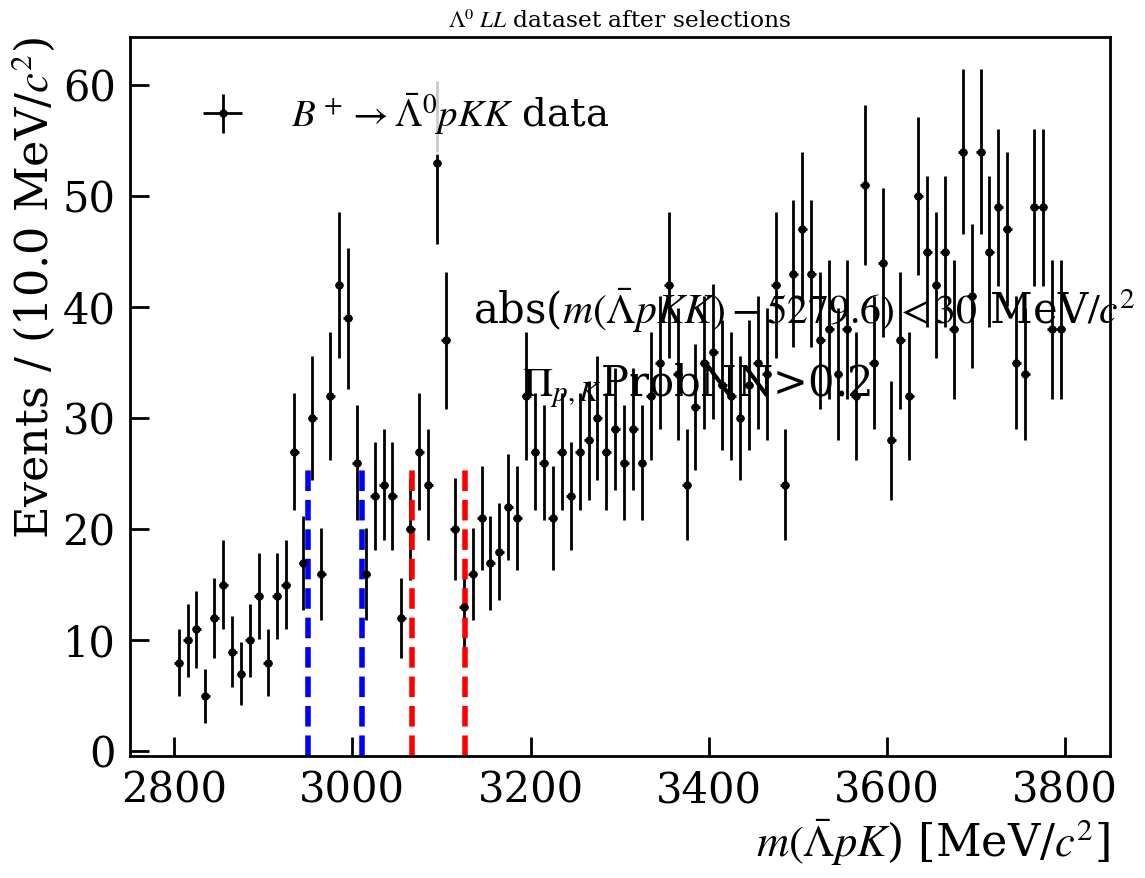

In [11]:
mjpsi = 3096.9
fig, ax = plt.subplots()
ranges, bins = [2800, 3800], 100
width = round((ranges[1]-ranges[0])/bins, 1)
histstyle = {"range":ranges, "bins":bins, "density": False}
plot_data(ax, data["ccbar_M"][(np.abs(data["Bu_DTFL0_M"]-5279.6)<30)].tolist(), decay + " data", histstyle)
ax.axvline(x=mjpsi-30, ymax=0.4, color="red", ls="--")
ax.axvline(x=mjpsi+30, ymax=0.4, color="red", ls="--")
ax.axvline(x=2980.3-30, ymax=0.4, color="blue", ls="--")
ax.axvline(x=2980.3+30, ymax=0.4, color="blue", ls="--")
ax.set_title(fr"$\Lambda^0~{track}$ dataset after selections")
ax.set_xlabel(r"$m(\bar{\Lambda}pK$) [MeV/$c^2$]")
ax.set_ylabel(fr"Events / ({width} MeV/$c^2$)")
plt.text(0.35, 0.6, r"abs($m(\bar{\Lambda}pKK)-5279.6)<30$ MeV$/c^2$", transform = ax.transAxes, fontsize=30)
plt.text(0.4, 0.5, r"$\Pi_{p,K}$ProbNN>0.2", transform = ax.transAxes, fontsize=30)
# plt.grid()
ax.legend()
plt.show()


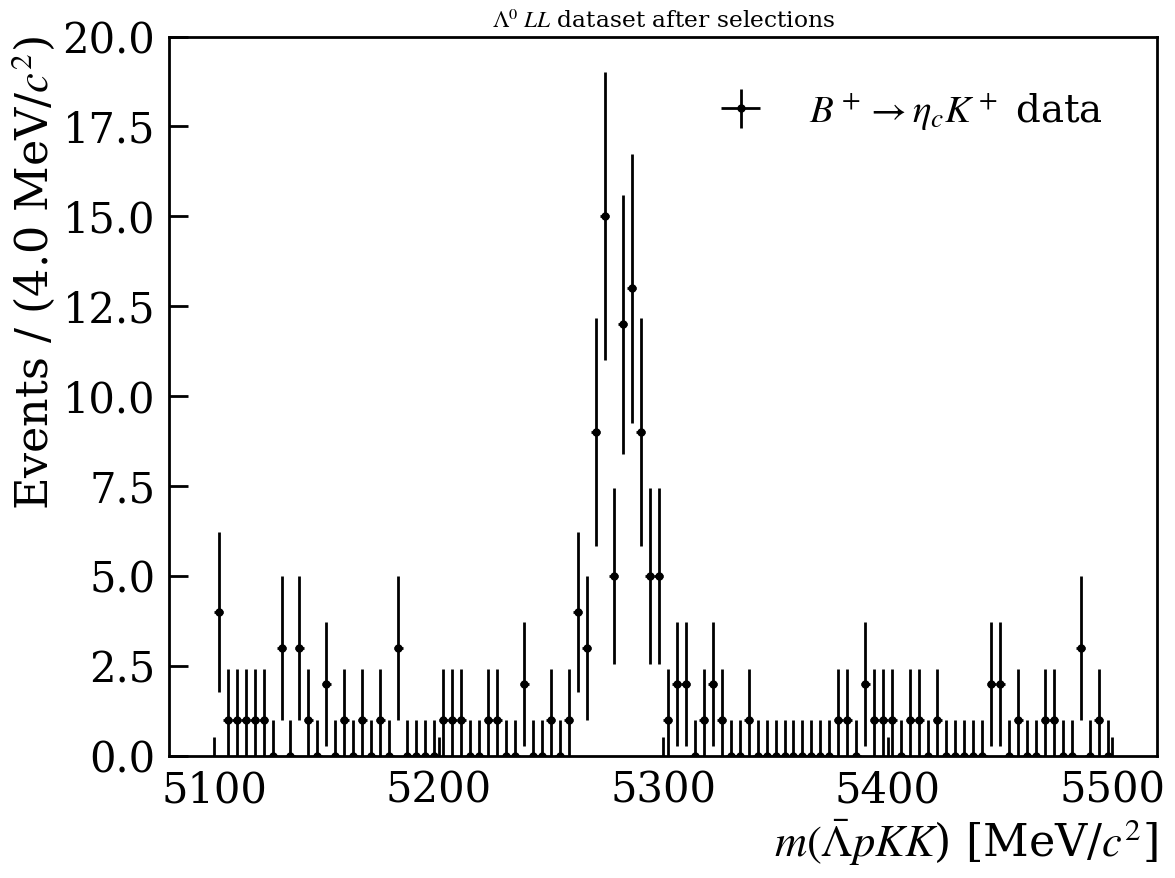

In [12]:
fig, ax = plt.subplots()
ranges, bins = [5100, 5500], 100
width = round((ranges[1]-ranges[0])/bins, 1)
histstyle = {"range":ranges, "bins":bins, "density": False}
plot_data(ax, data["Bu_DTFL0_M"][(np.abs(data["ccbar_M"]-2984.1)<30) & (data["p_ProbNNp"]*data["h1_ProbNNk"]*data["h2_ProbNNk"]>0.45) & (np.log(data["Bu_IPCHI2_OWNPV"])<1.95)].tolist(), r"$B^+\to \eta_c K^+$ data", histstyle)
ax.set_title(fr"$\Lambda^0~{track}$ dataset after selections")
ax.set_xlabel(r"$m(\bar{\Lambda}pKK$) [MeV/$c^2$]")
ax.set_ylabel(fr"Events / ({width} MeV/$c^2$)")
plt.gca().set_ylim(bottom=0)
ax.legend()
plt.show()

In [13]:
years = ["16", "17", "18"]
mc_files = [f"{mcPath}/MC{year}MDBu2JpsiKp_PKmL0bar.root:B2L0PbarKpKp_{track}/DecayTree" for year in years]

__mc = uproot.concatenate(mc_files, branches)

# Method 1: Using try/except approach
try:
    # Try to access the field to see if it exists
    test = __mc["ccbar_M1"]
    # If we get here, the field exists
    print("ccbar_M1 already exists")
except Exception:
    # Field doesn't exist, calculate it
    print("Calculating ccbar_M1")
    __mc["ccbar_M1"] = np.sqrt(
        (__mc["L0_PE"] + __mc["p_PE"] + __mc["h1_PE"])**2 - 
        (__mc["L0_PX"] + __mc["p_PX"] + __mc["h1_PX"])**2 -
        (__mc["L0_PY"] + __mc["p_PY"] + __mc["h1_PY"])**2 -
        (__mc["L0_PZ"] + __mc["p_PZ"] + __mc["h1_PZ"])**2
    )

# Do the same for ccbar_M2
try:
    test = __mc["ccbar_M2"]
    print("ccbar_M2 already exists")
except Exception:
    print("Calculating ccbar_M2")
    __mc["ccbar_M2"] = np.sqrt(
        (__mc["L0_PE"] + __mc["p_PE"] + __mc["h2_PE"])**2 - 
        (__mc["L0_PX"] + __mc["p_PX"] + __mc["h2_PX"])**2 -
        (__mc["L0_PY"] + __mc["p_PY"] + __mc["h2_PY"])**2 -
        (__mc["L0_PZ"] + __mc["p_PZ"] + __mc["h2_PZ"])**2
    )

# Alternative Method 2: Using fields() if available
"""
# Check if fields exist using the fields() method
if "ccbar_M1" not in __mc.fields():
    # Field doesn't exist, calculate it
    __mc["ccbar_M1"] = np.sqrt(
        (__mc["L0_PE"] + __mc["p_PE"] + __mc["h1_PE"])**2 - 
        (__mc["L0_PX"] + __mc["p_PX"] + __mc["h1_PX"])**2 -
        (__mc["L0_PY"] + __mc["p_PY"] + __mc["h1_PY"])**2 -
        (__mc["L0_PZ"] + __mc["p_PZ"] + __mc["h1_PZ"])**2
    )

if "ccbar_M2" not in __mc.fields():
    # Field doesn't exist, calculate it
    __mc["ccbar_M2"] = np.sqrt(
        (__mc["L0_PE"] + __mc["p_PE"] + __mc["h2_PE"])**2 - 
        (__mc["L0_PX"] + __mc["p_PX"] + __mc["h2_PX"])**2 -
        (__mc["L0_PY"] + __mc["p_PY"] + __mc["h2_PY"])**2 -
        (__mc["L0_PZ"] + __mc["p_PZ"] + __mc["h2_PZ"])**2
    )
"""

# Now create your histogram
fig, ax = plt.subplots()
plt.yscale('log')
range, bins = [3050, 4850], 300
width = round((range[1]-range[0])/bins, 1)

# Plot histograms
plt.hist(__mc["ccbar_M1"], weights=None, range=range, bins=bins, alpha=1, label=r"Combination 1")
plt.hist(__mc["ccbar_M2"], weights=None, range=range, bins=bins, alpha=0.6, color='peru', label=r"Combination 2")

# Set labels and styling
ax.set_title(r"Invariant mass of $\bar{\Lambda}pK$ for two combinations")
ax.set_xlabel(r"$m(\bar{\Lambda}pK)$ [MeV/$c^2$]")
ax.set_ylabel(fr"Events / ({width} MeV/$c^2$)")
plt.grid()
ax.legend()
plt.show()

NameError: name 'branches' is not defined

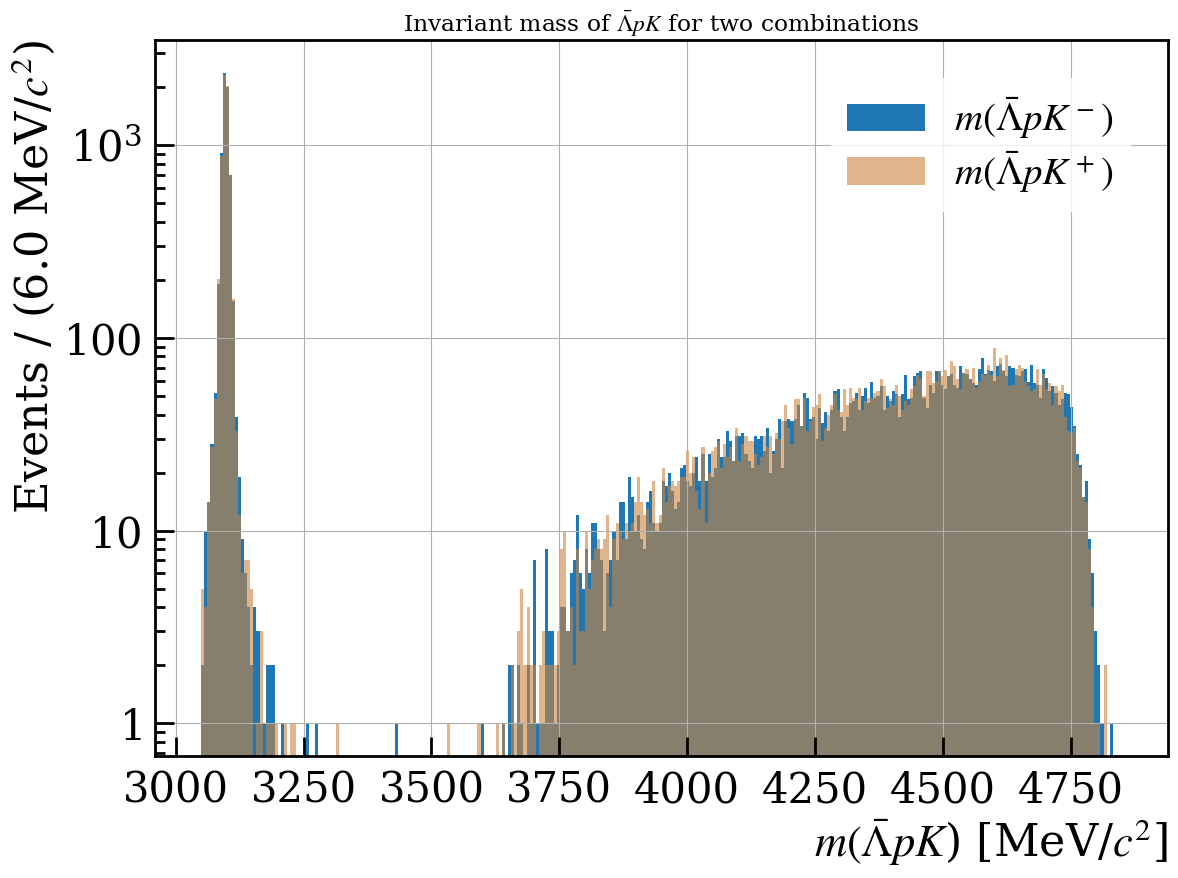

In [ ]:
__mc = select(__mc)
__mc = __mc[(abs(__mc["Bu_TRUEID"]==521))]

fig, ax = plt.subplots()
plt.yscale('log')
range, bins = [3050, 4850], 300
width = round((range[1]-range[0])/bins, 1)
#plt.hist(_mc["ccbar_M"], weights=None, range=range, bins=bins, label= r"min($m(\Lambda\bar{p}K^+_1), m(\Lambda\bar{p}K^+_2)$)")
plt.hist(__mc["ccbar_M2"], weights=None, range=range, bins=bins, alpha=1, label=r"$m(\bar{\Lambda}pK^-)$")
plt.hist(__mc["ccbar_M1"], weights=None, range=range, bins=bins, alpha=0.6, color='peru', label=r"$m(\bar{\Lambda}pK^+)$")
ax.set_title(r"Invariant mass of $\bar{\Lambda}pK$ for two combinations")
ax.set_xlabel(r"$m(\bar{\Lambda}pK$) [MeV/$c^2$]")
ax.set_ylabel(fr"Events / ({width} MeV/$c^2$)")
plt.grid()
ax.legend()
plt.show()

<class 'awkward.highlevel.Array'>


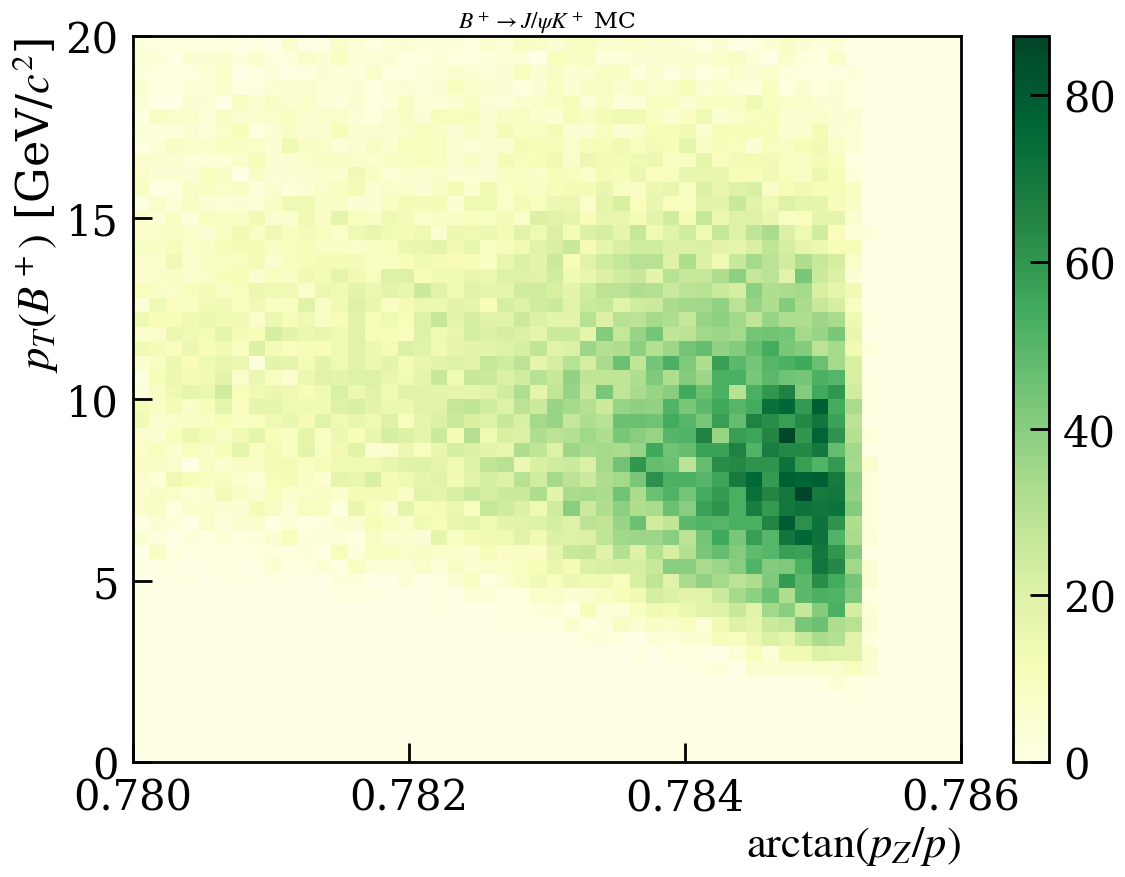

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
mc = _mc
mc["Bu_ETA"] = np.arctan(mc["Bu_PZ"]/mc["Bu_P"])
print(type(mc["Bu_ETA"]))
H = plt.hist2d(mc["Bu_ETA"].tolist(), mc["Bu_PT"].tolist(), range=[[0.780, 0.786],[0, 20000]], bins=50, density=False, cmap=mpl.cm.YlGn) #, norm=LogNorm())
plt.xlabel(r"$\arctan(p_Z/p)$")
plt.ylabel(r"$p_T(B^+)$ [GeV/$c^2$]")
plt.yticks([0, 5000, 10000, 15000, 20000], [0, 5, 10, 15, 20])
fig.colorbar(H[3],ax=ax)
plt.title(r"$B^+\to J/\psi K^+$ MC")
plt.show()

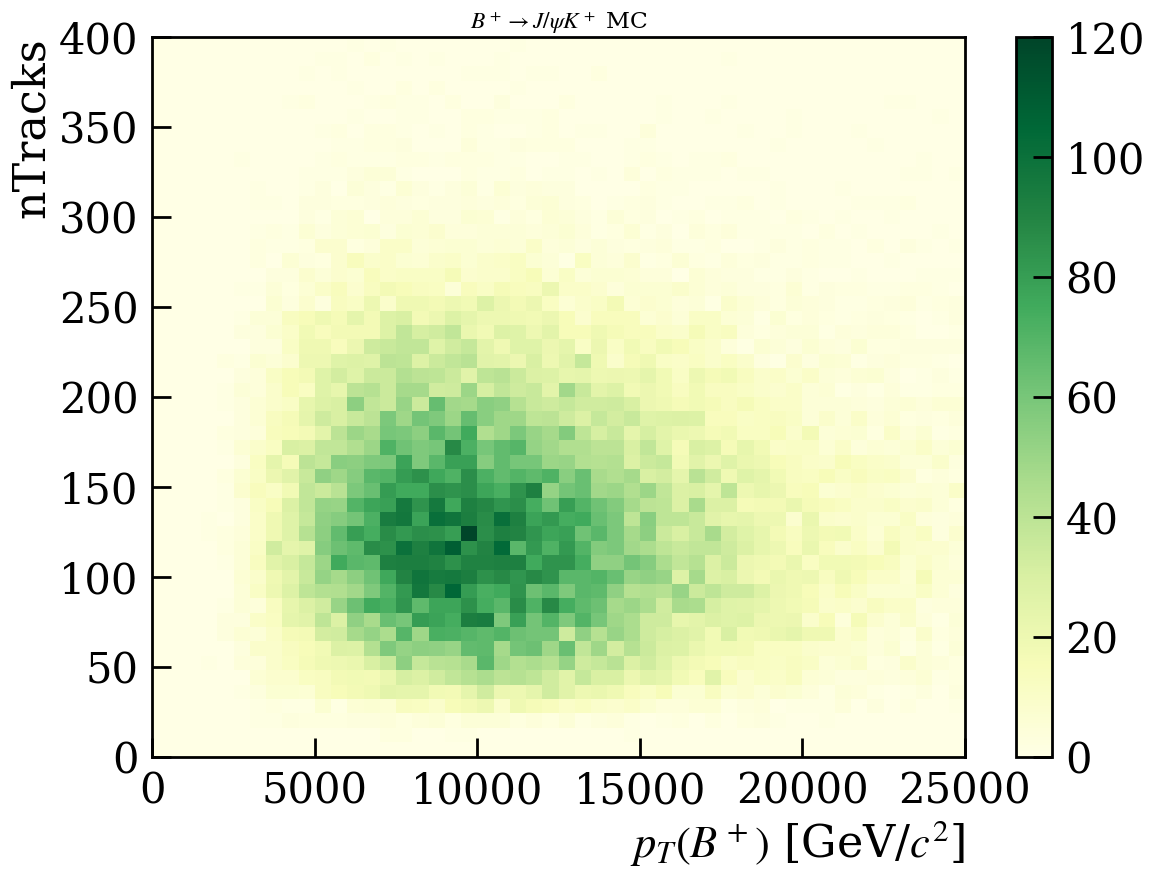

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
H = plt.hist2d(mc["Bu_PT"].tolist(), mc["nTracks"].tolist(), range=[[0, 25000],[0, 400]], bins=50, density=False, cmap=mpl.cm.YlGn) #, norm=LogNorm())
plt.ylabel(r"nTracks")
plt.title(r"$B^+\to J/\psi K^+$ MC")
plt.xlabel(r"$p_T(B^+)$ [GeV/$c^2$]")
# plt.yticks([0, 5000, 10000, 15000, 20000], [0, 5, 10, 15, 20])
fig.colorbar(H[3],ax=ax)
plt.show()

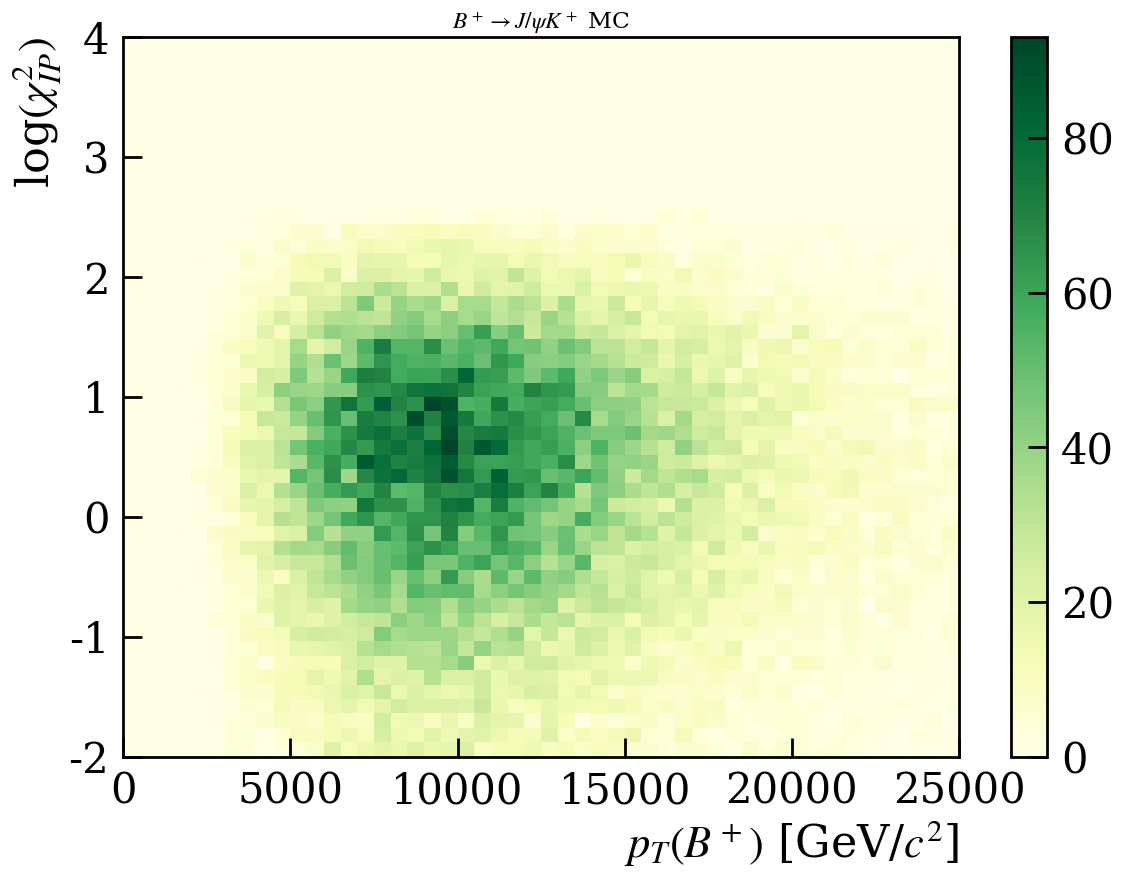

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
H = plt.hist2d(mc["Bu_PT"].tolist(), np.log(mc["Bu_IPCHI2_OWNPV"]).tolist(), range=[[0, 25000],[-2, 4]], bins=50, density=False, cmap=mpl.cm.YlGn) #, norm=LogNorm())
plt.ylabel(r"log$(\chi^2_{IP})$")
plt.title(r"$B^+\to J/\psi K^+$ MC")
plt.xlabel(r"$p_T(B^+)$ [GeV/$c^2$]")
# plt.yticks([0, 5000, 10000, 15000, 20000], [0, 5, 10, 15, 20])
fig.colorbar(H[3],ax=ax)
plt.show()

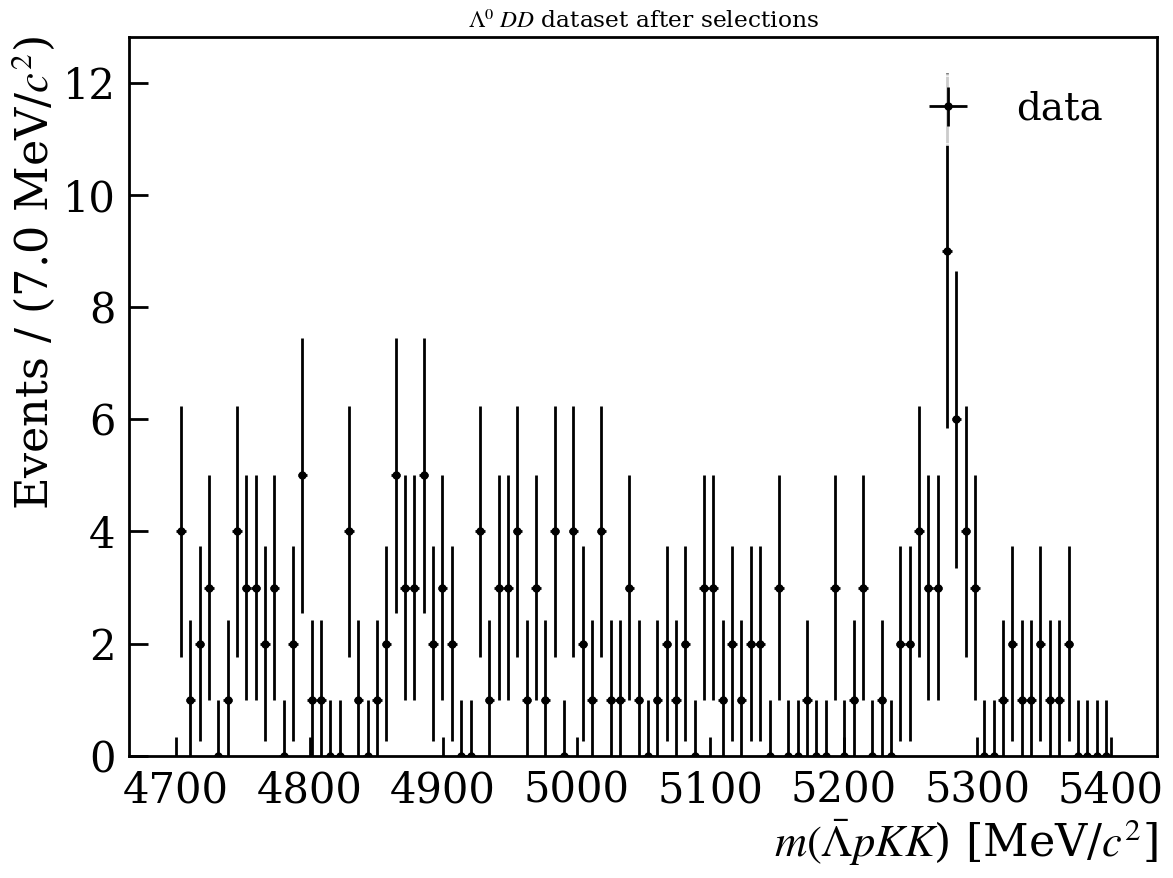

In [ ]:
fig, ax = plt.subplots()
ranges, bins = [4700, 5400], 100
width = round((ranges[1]-ranges[0])/bins, 1)
histstyle = {"range":ranges, "bins":bins, "density": False}

selection = (data["ccbar_M"]>2984.1+60) & (data["ccbar_M"]<3096.9-30) & (data["p_ProbNNp"]*data["h1_ProbNNk"]*data["h2_ProbNNk"]>0.45) & (np.log(data["Bu_IPCHI2_OWNPV"])<1.95)
plot_data(ax, data["Bu_DTFL0_M"][selection].tolist(), r"data", histstyle)
# plot_data(ax, data["Bu_DTF_L0_M"][(data["ccbar_M"]>2984.1+30) & (data["ccbar_M"]<3096.9-30) & (data["p_ProbNNp"]*data["h1_ProbNNk"]*data["h2_ProbNNk"]>0.45) & (np.log(data["Bu_IPCHI2_OWNPV"])<1.95)].tolist(), r"data", histstyle)

# plt.text(x=4800,y=70,s=r"$m(\eta_c)+30<m(\bar{\Lambda}pK)<m(J/\psi)-30$", fontsize=27)
# plt.text(x=4800,y=60,s=r"No $\chi^2_{\rm IP}$ cut", fontsize=27)
ax.set_title(fr"$\Lambda^0~{track}$ dataset after selections")
ax.set_xlabel(r"$m(\bar{\Lambda}pKK$) [MeV/$c^2$]")
ax.set_ylabel(fr"Events / ({width} MeV/$c^2$)")
plt.gca().set_ylim(bottom=0)
ax.legend()
plt.show()

/tmp/melashri/ipykernel_2925680/2368506579.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


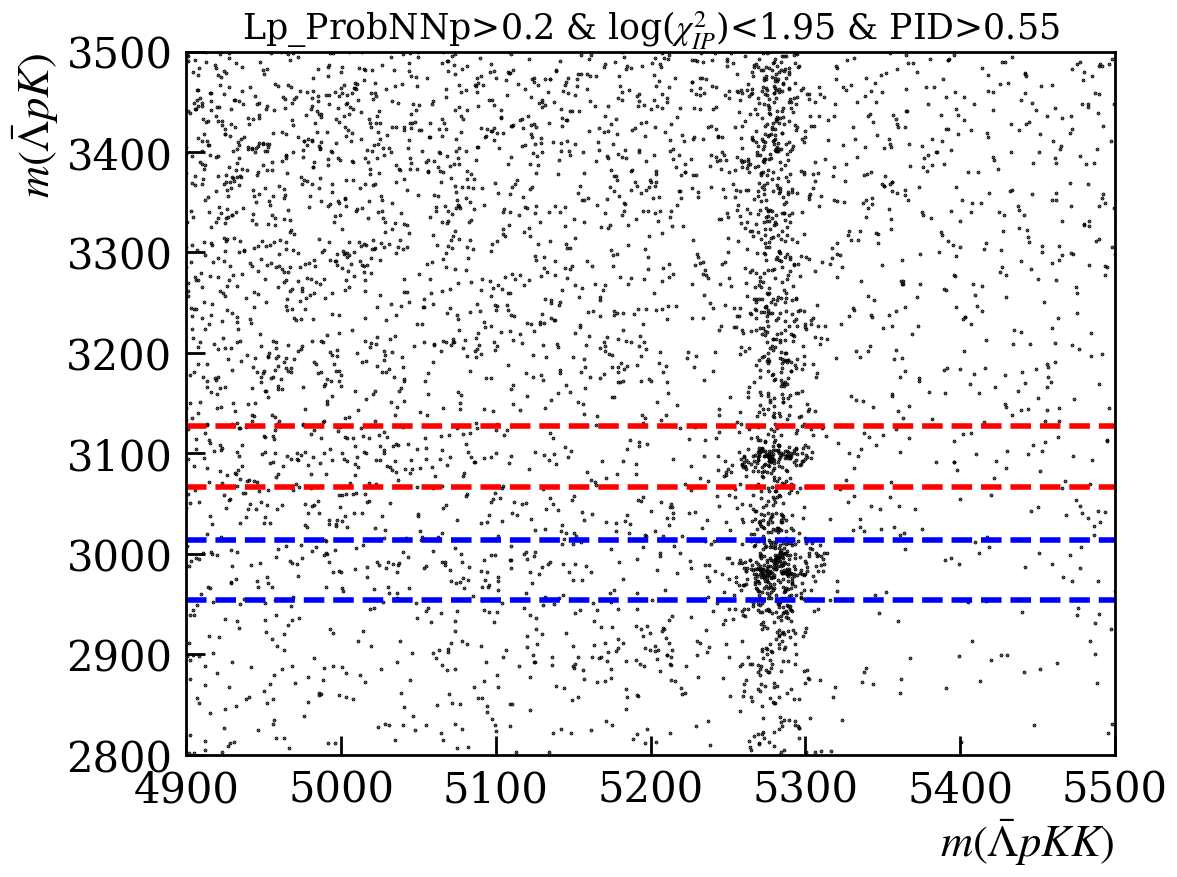

In [ ]:
fig, ax = plt.subplots()
adata = data[ (data["p_ProbNNp"]*data["h1_ProbNNk"]*data["h2_ProbNNk"]>0.55) & (np.log(data["Bu_IPCHI2_OWNPV"])<1.95)]
plt.scatter(adata["Bu_DTFL0_M"], adata["ccbar_M"], s=0.5, color="black", label=None)
plt.xlabel(r"$m(\bar{\Lambda}pKK)$")
plt.ylabel(r"$m(\bar{\Lambda}pK)$")

plt.xlim([4900, 5500])
plt.ylim([2800, 3500])

ax.axhline(y=2984.3-30, xmax=1, color="blue", ls="--")
ax.axhline(y=2984.3+30, xmax=1, color="blue", ls="--")
ax.axhline(y=3096.9-30, xmax=1, color="red", ls="--")
ax.axhline(y=3096.9+30, xmax=1, color="red", ls="--")

plt.title(r"Lp_ProbNNp>0.2 & log($\chi^2_{IP}$)<1.95 & PID>0.55", fontsize=25)
plt.legend()
plt.show()

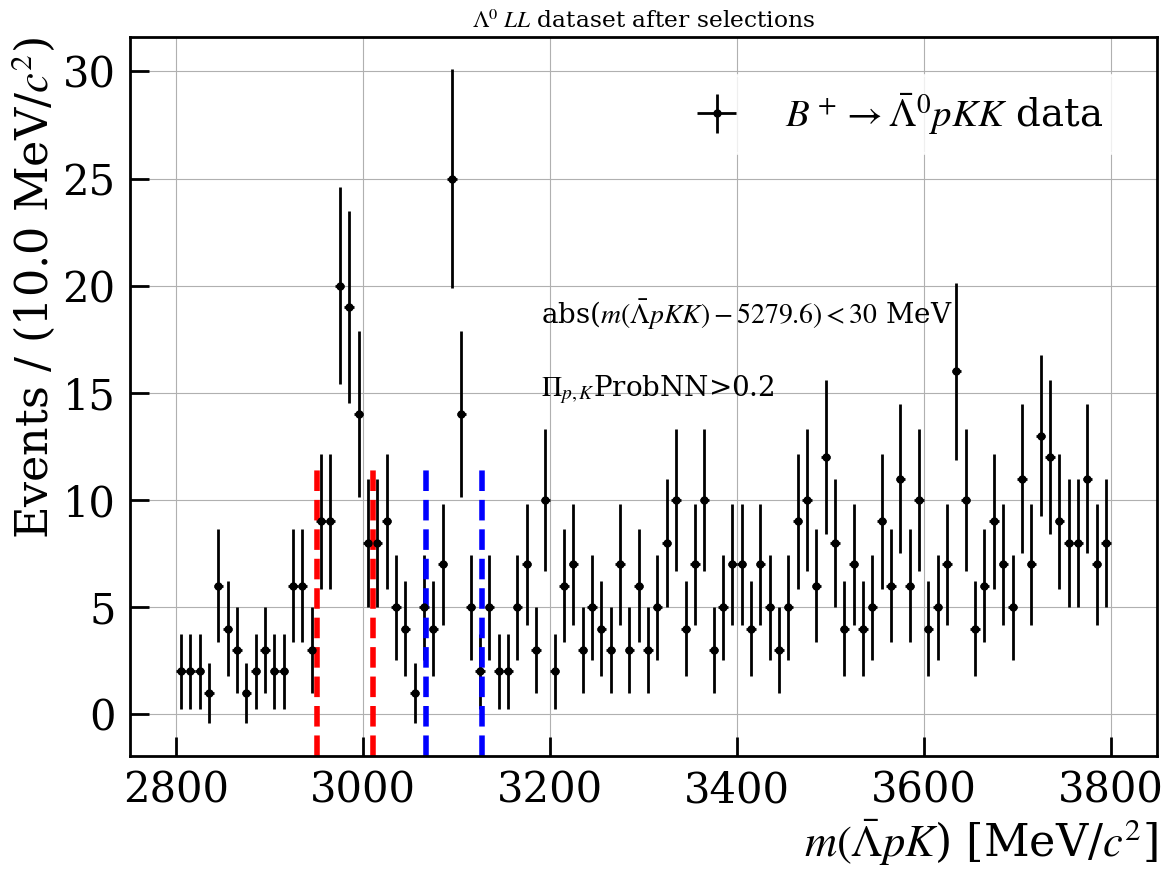

In [18]:
track = "LL"
def select(arr):
    if track == "LL":
        selection = ((arr["p_MC15TuneV1_ProbNNp"] * arr["h1_MC15TuneV1_ProbNNk"] * arr["h2_MC15TuneV1_ProbNNk"])>0.2)

    else:
        selection = ((arr["p_MC15TuneV1_ProbNNp"] * arr["h1_MC15TuneV1_ProbNNk"] * arr["h2_MC15TuneV1_ProbNNk"])>0.2)
    return arr[selection]

data = select(data)


fig, ax = plt.subplots()
ranges, bins = [2800, 3800], 100
width = round((ranges[1]-ranges[0])/bins, 1)
histstyle = {"range":ranges, "bins":bins, "density": False}
plot_data(ax, data["ccbar_M"][(np.abs(data["Bu_DTFL0_M"]-5279.6)<30)].tolist(), decay + " data", histstyle)
ax.axvline(x=mjpsi-30, ymax=0.4, color="blue", ls="--")
ax.axvline(x=mjpsi+30, ymax=0.4, color="blue", ls="--")
ax.axvline(x=2980.3-30, ymax=0.4, color="red", ls="--")
ax.axvline(x=2980.3+30, ymax=0.4, color="red", ls="--")
# ax.axvline(x=3637.7, ymax=0.4, color="red", ls="--")
ax.set_title(fr"$\Lambda^0~{track}$ dataset after selections")
ax.set_xlabel(r"$m(\bar{\Lambda}pK$) [MeV/$c^2$]")
ax.set_ylabel(fr"Events / ({width} MeV/$c^2$)")
plt.text(0.4, 0.6, r"abs($m(\bar{\Lambda}pKK)-5279.6)<30$ MeV", transform = ax.transAxes, fontsize=20)
if track == "LL":
    plt.text(0.4, 0.5, r"$\Pi_{p,K}$ProbNN>0.2", transform = ax.transAxes, fontsize=20)
if track == "DD":
    plt.text(0.4, 0.5, r"$\Pi_{p,K}$ProbNN>0.2", transform = ax.transAxes, fontsize=20)    
plt.grid()
ax.legend()
plt.show()

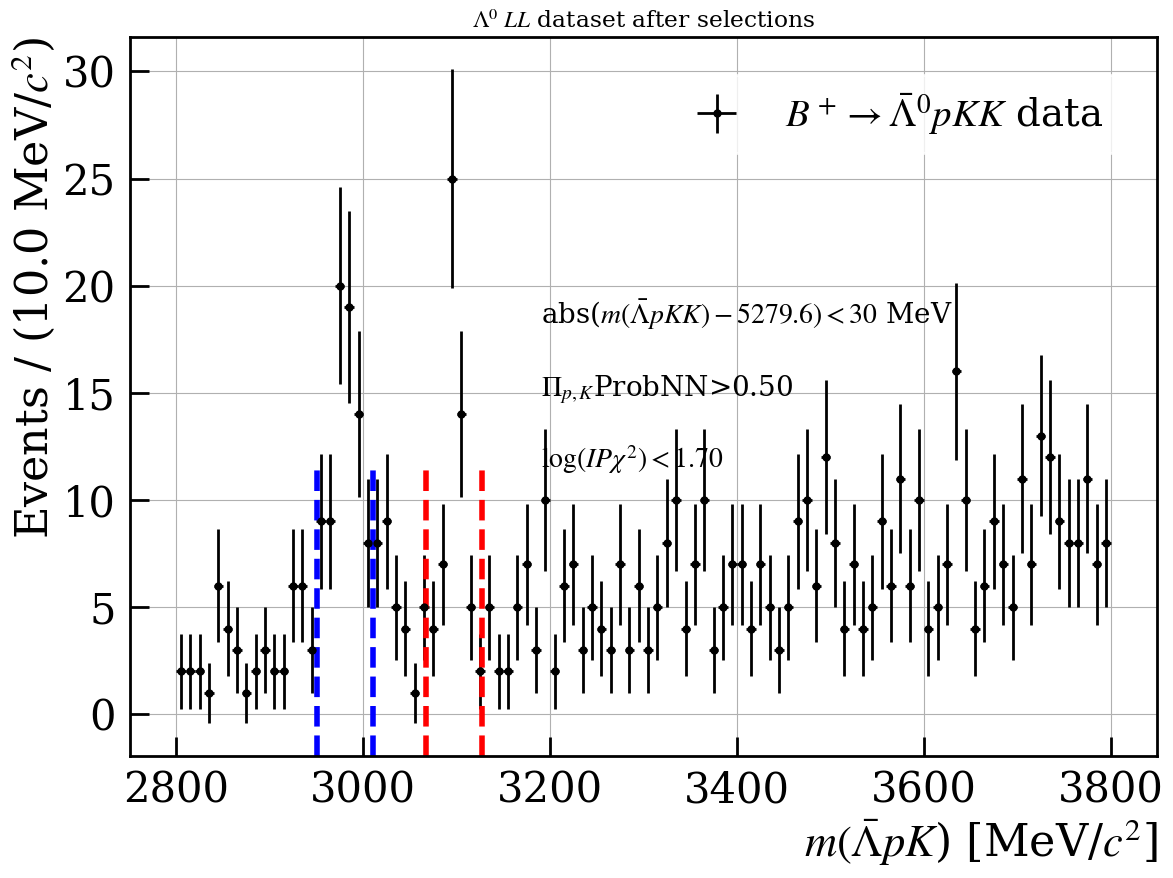

In [17]:
def select(arr):
    if track == "LL":
        selection = ((arr["p_MC15TuneV1_ProbNNp"] * arr["h1_MC15TuneV1_ProbNNk"] * arr["h2_MC15TuneV1_ProbNNk"])>0.50)  & (np.log(arr["Bu_IPCHI2_OWNPV"])<1.70)

    else:
        selection = ((arr["p_MC15TuneV1_ProbNNp"] * arr["h1_MC15TuneV1_ProbNNk"] * arr["h2_MC15TuneV1_ProbNNk"])>0.55)  & (np.log(arr["Bu_IPCHI2_OWNPV"])<2.00)
    return arr[selection]

data = select(data)


fig, ax = plt.subplots()
ranges, bins = [2800, 3800], 100
width = round((ranges[1]-ranges[0])/bins, 1)
histstyle = {"range":ranges, "bins":bins, "density": False}
plot_data(ax, data["ccbar_M"][(np.abs(data["Bu_DTFL0_M"]-5279.6)<30)].tolist(),  decay + " data", histstyle)
ax.axvline(x=mjpsi-30, ymax=0.4, color="red", ls="--")
ax.axvline(x=mjpsi+30, ymax=0.4, color="red", ls="--")
ax.axvline(x=2980.3-30, ymax=0.4, color="blue", ls="--")
ax.axvline(x=2980.3+30, ymax=0.4, color="blue", ls="--")
ax.set_title(fr"$\Lambda^0~{track}$ dataset after selections")
ax.set_xlabel(r"$m(\bar{\Lambda}pK$) [MeV/$c^2$]")
ax.set_ylabel(fr"Events / ({width} MeV/$c^2$)")
plt.text(0.4, 0.6, r"abs($m(\bar{\Lambda}pKK)-5279.6)<30$ MeV", transform = ax.transAxes, fontsize=20)
if track == "LL":
    plt.text(0.4, 0.5, r"$\Pi_{p,K}$ProbNN>0.50", transform = ax.transAxes, fontsize=20)
    plt.text(0.4, 0.4, r"$\log(IP\chi^2)<1.70$", transform = ax.transAxes, fontsize=20)
if track == "DD":
    plt.text(0.4, 0.5, r"$\Pi_{p,K}$ProbNN>0.55", transform = ax.transAxes, fontsize=20)
    plt.text(0.4, 0.4, r"$\log(IP\chi^2)<2.00$", transform = ax.transAxes, fontsize=20)
    
plt.grid()
ax.legend()
plt.show()